In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import random
import os

In [2]:
# After downloading cifar-10-python.tar.gz from Kaggle:

import tarfile
my_tar = tarfile.open('cifar-10-python.tar.gz')
my_tar.extractall('./cifar-10') # specify which folder to extract to
my_tar.close()

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
path = "./cifar-10/cifar-10-batches-py"

training_data = []
training_labels = []

validation_data = []
validation_labels = []

training_fnames = [fname for fname in os.listdir(path) if "data_batch_" in fname]
validation_fname = 'test_batch'

for fname in training_fnames:
    f = unpickle(os.path.join(path, fname))
    training_data.extend(f[b'data'])
    training_labels.extend(f[b'labels'])

f = unpickle(os.path.join(path, validation_fname))
validation_data.extend(f[b'data'])
validation_labels.extend(f[b'labels'])

training_data = np.array(training_data)
training_labels = np.array(training_labels)

training_data = training_data.reshape(50000, 3, 32,32)
training_data = np.swapaxes(training_data, 1, 3)
training_data = np.swapaxes(training_data, 1, 2)

validation_data = np.array(validation_data)
validation_labels = np.array(validation_labels)

validation_data = validation_data.reshape(10000, 3, 32,32)
validation_data = np.swapaxes(validation_data, 1, 3)
validation_data = np.swapaxes(validation_data, 1, 2)

# Sanity check for directory sizes:

print(len(training_data))
print(len(training_labels))
print(len(validation_data))
print(len(validation_labels))

50000
50000
10000
10000


In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(training_data,
                                     training_labels,
                                     batch_size=50)
validation_generator = validation_datagen.flow(validation_data,
                                               validation_labels,
                                               batch_size=50)

# Check array shapes:

print(training_data.shape)
print(validation_data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


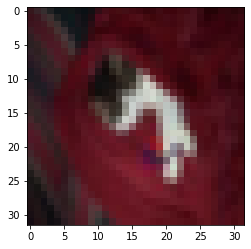

In [47]:
# Look at a random image to make sure everything looks OK:

import matplotlib.pyplot as plt
import matplotlib.image as mping

imgplot = plt.imshow(random.choice(validation_data))

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    epochs=50,
    verbose=1,
    validation_steps = 50)

Epoch 1/50
1000/1000 [==============================] - 214s 214ms/step - loss: 1.7600 - accuracy: 0.3579 - val_loss: 1.3538 - val_accuracy: 0.5240
Epoch 2/50
1000/1000 [==============================] - 217s 217ms/step - loss: 1.5101 - accuracy: 0.4595 - val_loss: 1.3191 - val_accuracy: 0.5220
Epoch 3/50
1000/1000 [==============================] - 222s 222ms/step - loss: 1.3969 - accuracy: 0.5001 - val_loss: 1.1372 - val_accuracy: 0.5860
Epoch 4/50
1000/1000 [==============================] - 225s 225ms/step - loss: 1.3218 - accuracy: 0.5315 - val_loss: 0.9844 - val_accuracy: 0.6476
Epoch 5/50
1000/1000 [==============================] - 220s 220ms/step - loss: 1.2790 - accuracy: 0.5475 - val_loss: 0.9844 - val_accuracy: 0.6548
Epoch 6/50
1000/1000 [==============================] - 221s 221ms/step - loss: 1.2255 - accuracy: 0.5640 - val_loss: 1.0557 - val_accuracy: 0.6288
Epoch 7/50
1000/1000 [==============================] - 224s 224ms/step - loss: 1.1906 - accuracy: 0.5817 - val_

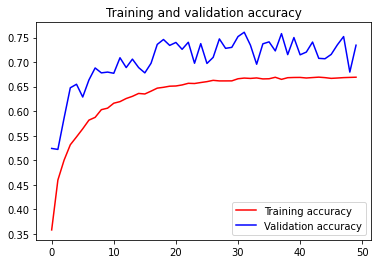

<Figure size 432x288 with 0 Axes>

In [76]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()